In [ ]:
# !pip install gymnasium

#### Imports

In [15]:
# Configuraciones
from collections import defaultdict

# Las de siempre
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import seaborn as sns
import time
from tqdm import tqdm

# Aprendizaje por Refuerzo
import gymnasium as gym  # https://gymnasium.farama.org/index.html

# Conceptos Básicos

* Agente: Es la entidad que toma decisiones y realiza acciones en el entorno para lograr un objetivo.

* Entorno: Es el contexto en el que el agente toma decisiones y realiza acciones. Puede ser cualquier sistema que el agente esté tratando de aprender y mejorar.

* Episodio: Es un período completo de interacción entre el agente y el entorno, desde el inicio hasta que se alcanza un estado final.

* Estado: Es una situación específica en la que se encuentra el entorno en un momento dado.

* Recompensa: Es la retroalimentación que el agente recibe del entorno después de realizar una acción en un estado particular. Indica cuán buena o mala fue esa acción.

* Política: Es la estrategia o conjunto de reglas que el agente sigue para tomar decisiones en diferentes estados. Puede ser determinística o probabilística.

* Alpha (tasa de aprendizaje): Es cuánto el agente aprende de una nueva experiencia. Una tasa alta significa aprendizaje rápido, pero puede ser volátil.

* Gamma (descuento): Controla cuánto valoramos las recompensas futuras. Un valor alto prioriza las recompensas a largo plazo.

* Epsilon (exploración vs. explotación): Decide cuánto el agente elige acciones aleatorias en lugar de las aprendidas. A medida que disminuye, el agente tiende a elegir acciones que conoce mejor.

# Q- Learning

Q-Learning es un algoritmo de aprendizaje por refuerzo que permite a un agente aprender a tomar decisiones óptimas en un entorno desconocido. El agente mantiene una tabla (llamada tabla Q) que asigna un valor (Q-value) a cada par estado-acción. Estos valores representan la utilidad esperada de realizar una acción en un estado particular.

Durante la interacción con el entorno, el agente actualiza los Q-valores usando la fórmula de actualización Q, que tiene en cuenta las recompensas inmediatas y los Q-values futuros.

Con el tiempo, el agente aprende una política óptima al seleccionar las acciones con los Q-values más altos en cada estado. Q-Learning es efectivo para problemas de toma de decisiones secuenciales, como juegos o control de robots.

$$
Q[state, action] = Q[state, action] + \text{learning\_rate} \cdot ( \text{reward} + \text{gamma} \cdot \max(Q[new\_state, :]) - Q[state, action] )
$$

## Del Punto A al Punto B

                                                        O----T

In [ ]:
n_states = 6   # longitud del entorno
actions = ['left', 'right']     # acciones disponibles
epsilon = 0.9   # 'greedy policy': exploración vs explotación -> exploración (non-greedy)
alpha = 0.1     # 'learning rate': nivel de 'confianza' del agente -> desconfiado, cauto
gamma = 0.9    # 'discount factor': si las recompensas disminuyen con el tiempo.
max_episodes = 13   # número máximo de episodios
fresh_time = 0.3    # tiempo de actualización entre episodios

In [ ]:
def build_q_table(n_states, actions):
    table = pd.DataFrame(np.zeros((n_states, len(actions))),
                         columns= actions)
    # print(table)
    return table

build_q_table(6, ['left', 'right'])

In [ ]:
def choose_action(state, q_table):
    state_actions = q_table.iloc[state, :]
    if (np.random.uniform() > epsilon) or ((state_actions == 0).all()):  # non greedy, obligándolo a explorar
        action_name = np.random.choice(actions)
    else:   # greedy
        action_name = state_actions.idxmax()    # escoger la acción con el valor más alto
    return action_name


def get_env_feedback(S, A):
    # Interacción del agente con el entorno
    if A == 'right':  # Si te mueves a la derecha
        if S == n_states - 2:  # Y estabas en el penúltimo lugar (-1 es el último)
            S_ = 'terminal'
            R = 1  # recompensa
        else:
            S_ = S + 1
            R = 0
    else:   # izquierda
        R = 0
        if S == 0:
            S_ = S  # inicio
        else:
            S_ = S - 1
    return S_, R


def update_env(S, episode, step_counter):
    env_list = ['-']*(n_states-1) + ['T']   # '---------T'
    if S == 'terminal':
        interaction = 'Episode %s: total_steps = %s' % (episode +1, step_counter)
        print('\r{}'.format(interaction), end='')
        time.sleep(2)
        print('\r                                ', end='')
    else:
        env_list[S] = 'o'
        interaction = ''.join(env_list)
        print('\r{}'.format(interaction), end='')
        time.sleep(fresh_time)


def rl():
    # Aprendizaje por refuerzo (RL)
    q_table = build_q_table(n_states, actions)
    for episode in range(max_episodes):
        step_counter = 0
        S = 0
        is_terminated = False
        update_env(S, episode, step_counter)
        while not is_terminated:

            A = choose_action(S, q_table)  # Elegir A basada en S actual y QT
            S_, R = get_env_feedback(S, A)  # Obtener nuevo S y R
            q_predict = q_table.loc[S, A]
            if S_ != 'terminal':
                q_target = R + gamma * q_table.iloc[S_, :].max() # Lo que tiene y lo que quiere
                                                                 # Al principio, no sabe lo que quiere, será todo aleatorio
            else:
                q_target = R    
                is_terminated = True

            q_table.loc[S, A] += alpha * (q_target - q_predict) # Ajusta QT en base a sus "experiencias":
                                                                # Si la realidad es mejor de lo que esperaba, ajusta sus expectativas hacia arriba
                                                                # Si es peor, las ajusta hacia abajo.
            S = S_ 

            update_env(S, episode, step_counter+1)
            step_counter += 1
    return q_table

In [ ]:
np.random.seed(5)

q_table = rl()
print('\r\nQ-table:\n')
q_table

## Gymnasium (Gym)

Gymnasium, anteriormente Gym, es una biblioteca de código abierto desarrollada por OpenAI que proporciona entornos de prueba estándar para experimentar con algoritmos de aprendizaje por refuerzo. Ofrece una variedad de entornos predefinidos, desde juegos simples hasta problemas complejos, permitiendo a los desarrolladores y científicos de datos entrenar y evaluar agentes de aprendizaje por refuerzo de manera consistente.

Gym facilita la experimentación y comparación de diferentes enfoques de aprendizaje por refuerzo al proporcionar un marco unificado para la creación y evaluación de entornos.

In [ ]:
env_keys = gym.envs.registry.keys()

for key in env_keys:
    print(key)

print('------------------')
print('Total de entornos:', len(env_keys))

# Cartpole

# Blackjack

![](https://gymnasium.farama.org/_images/blackjack_AE_loop_dark.png)

## Funcionamiento

In [8]:
env = gym.make('Blackjack-v1',
               #nat = False # Otorga recompensa si el jugador empieza con 21.
               sab = True, # Si el jugador tiene 21 y el dealer también, es un empate. http://www.incompleteideas.net/book/RLbook2020.pdf
               )

env.reset()

((19, 4, False), {})

In [ ]:
from env.blackjack import BlackjackEnv

env = BlackjackEnv()
env.reset()

In [ ]:
env.render()

In [10]:
observation, info = env.reset(seed = 0)
print(observation[0], ': Jugador')
print(observation[1], ': Dealer')
print(observation[2], ': Hay algún as "utilizable"')

11 : Jugador
10 : Dealer
0 : Hay algún as "utilizable"


In [11]:
# Elegimos una acción aleatoria
action = env.action_space.sample()

# 0 = stand (nos quedamos con el valor que tenemos)
# 1 = hit (pedimos una carta más)

action

1

In [12]:
observation, reward, terminated, truncated, info = env.step(action)

print(action, observation, terminated, reward)

1 (12, 10, 0) False 0.0


## Agente

In [9]:
from agent.blackjack import BlackjackAgent

In [10]:
learning_rate = 0.01 # alpha
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = BlackjackAgent(learning_rate = learning_rate,
                       initial_epsilon = start_epsilon,
                       epsilon_decay = epsilon_decay,
                       final_epsilon = final_epsilon,)

### Entrenamiento

In [13]:
env.reset()
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size = n_episodes)

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:29<00:00, 3429.51it/s]


### Análisis

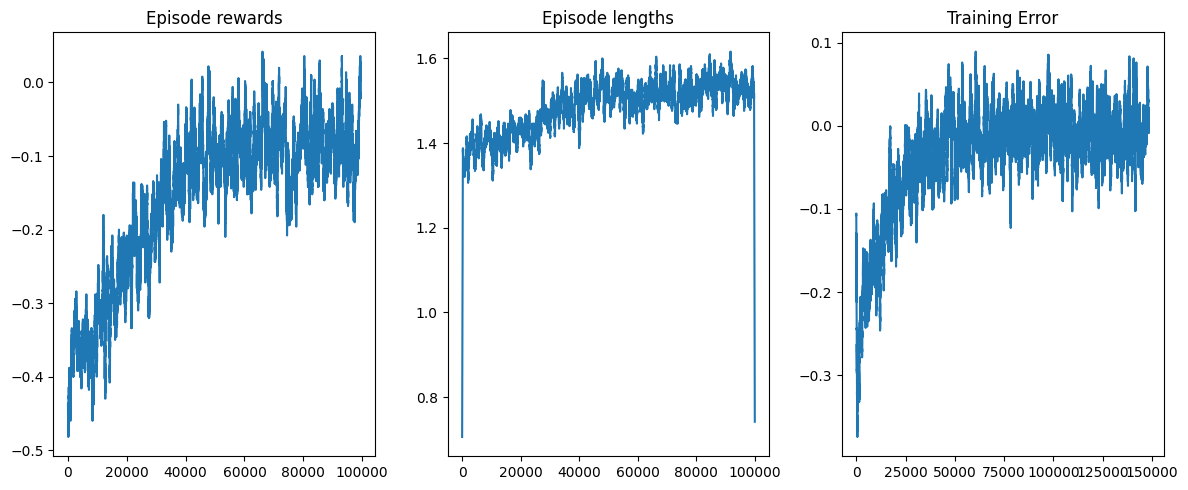

In [16]:
rolling_length = 500
fig, axs = plt.subplots(ncols = 3, figsize = (12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (np.convolve(np.array(env.return_queue).flatten(),
                                     np.ones(rolling_length),
                                     mode = "valid") / rolling_length)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (np.convolve(np.array(env.length_queue).flatten(),
                                     np.ones(rolling_length),
                                     mode = "same") / rolling_length)
axs[1].plot(range(len(length_moving_average)),
            length_moving_average)
axs[2].set_title("Training Error")
training_error_moving_average = (np.convolve(np.array(agent.training_error),
                                             np.ones(rolling_length),
                                             mode = "same") / rolling_length)
axs[2].plot(range(len(training_error_moving_average)),
            training_error_moving_average)
plt.tight_layout()
plt.show()

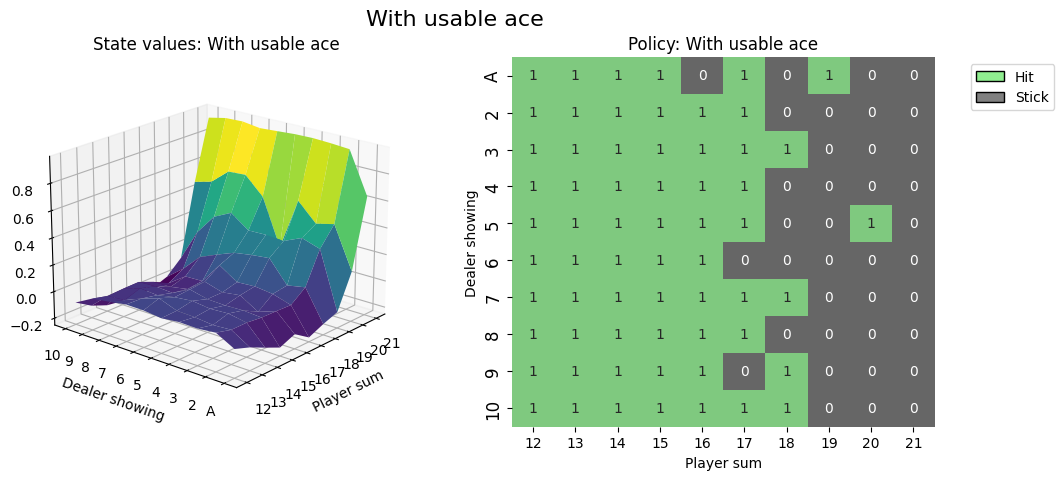

In [17]:
def create_grids(agent, usable_ace = False):
    """Create value and policy grid given an agent."""
    # convert our state-action values to state values
    # and build a policy dictionary that maps observations to actions
    state_value = defaultdict(float)
    policy = defaultdict(int)
    for obs, action_values in agent.q_values.items():
        state_value[obs] = float(np.max(action_values))
        policy[obs] = int(np.argmax(action_values))

    player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(12, 22),
        np.arange(1, 11))

    # create the value grid for plotting
    value = np.apply_along_axis(lambda obs: state_value[(obs[0], obs[1], usable_ace)],
                                axis = 2,
                                arr = np.dstack([player_count, dealer_count]))
    value_grid = player_count, dealer_count, value

    # create the policy grid for plotting
    policy_grid = np.apply_along_axis(lambda obs: policy[(obs[0], obs[1], usable_ace)],
                                      axis=2,
                                      arr=np.dstack([player_count, dealer_count]))
    return value_grid, policy_grid


def create_plots(value_grid, policy_grid, title: str):
    """Creates a plot using a value and policy grid."""
    # create a new figure with 2 subplots (left: state values, right: policy)
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    # plot the state values
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(player_count,
                     dealer_count,
                     value,
                     rstride=1,
                     cstride=1,
                     cmap="viridis",
                     edgecolor="none",)
    plt.xticks(range(12, 22), range(12, 22))
    plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=14, rotation=90)
    ax1.view_init(20, 220)

    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    # add a legend
    legend_elements = [Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
                       Patch(facecolor="grey", edgecolor="black", label="Stick")]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig


# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(agent, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

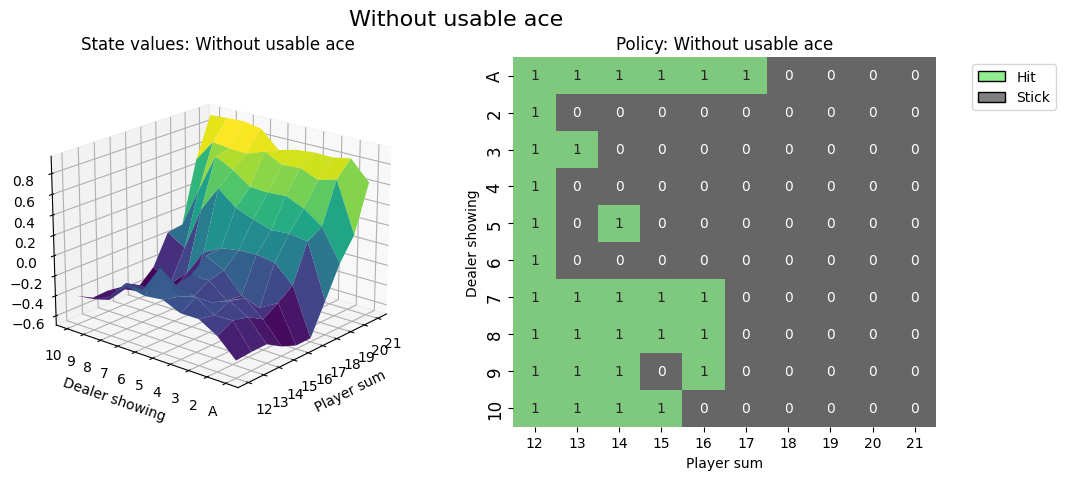

In [18]:
value_grid, policy_grid = create_grids(agent, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

In [ ]:
env.close()

# Pruebas

Inicialización: Inicializamos la tabla Q, que es una matriz donde las filas representan estados y las columnas representan acciones. Inicialmente, los valores en esta tabla pueden ser aleatorios.

Elección de Acción: Para cada episodio, observamos el estado actual y elegimos una acción. La elección de la acción puede ser determinista o basada en una política de exploración, que se introduce con el parámetro epsilon.

Interacción con el Entorno: Tomamos la acción elegida y observamos la recompensa del entorno. También observamos el nuevo estado.

Actualización de Q-Value: Actualizamos el valor Q para la acción tomada en el estado actual utilizando la fórmula de actualización de Q:

In [ ]:
actions = ['left', 'right']
epsilon = 0.9
alpha = 0.1
gamma = 0.9
max_episodes = 1000

In [ ]:
def build_q_table(n_states, actions):
    table = pd.DataFrame(np.zeros((n_states, len(actions))),
                         columns = actions)
    return table